# **API_2_Vasquez_Jorge_Luis - Machine Learning**


### Situación: 
##### Estudio sobre datos del Titanic, entrenar un modelo para predecir logra sobrevivir o no

### Consigna:
### Análisis de Supervivencia en el Titanic - Regresión Logística

### Descripción del Desafío
El objetivo es generar un modelo de regresión logística que permita calcular el grado de accuracy para determinar quiénes son los sobrevivientes en el grupo de prueba del Titanic.

### Plan de Trabajo

### a) Análisis de Valores Faltantes
**Descripción:** Identificación de datos missing en los datasets de entrenamiento y prueba.

**Variables con missing values:**

| Dataset | Variable | Cantidad Missing | Porcentaje |
|---------|----------|------------------|------------|
| Train | Age | ~177 | ~20% |
| Train | Cabin | ~687 | ~77% |
| Train | Embarked | ~2 | ~0.2% |
| Test | Age | ~86 | ~20% |
| Test | Cabin | ~327 | ~78% |
| Test | Fare | ~1 | ~0.2% |

### b) Imputación de Valores Faltantes
**Estrategias de imputación:**

**Para dataset Train:**
- **Age:** Mediana por clase y género
- **Cabin:** "Unknown" o extraer la cubierta (deck)
- **Embarked:** Valor más frecuente (moda)

**Para dataset Test:**
- **Age:** Mediana por clase y género  
- **Cabin:** "Unknown"
- **Fare:** Mediana por clase

### c) Primer Modelo de Regresión Logística
**Configuración del modelo:**
```python
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state=42)

#### Cargo las librerias correspondientes

In [2]:
# importar las librias 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


%matplotlib inline

### Informacion sobre los datos que contienen los data set del Titanic

| Variable | Notas |
|---------|-------|
| **pclass** | • Indicador aproximado del estatus socioeconómico (SES):<br> ▪ 1st: Clase alta<br> ▪ 2nd: Clase media<br> ▪ 3rd: Clase baja |
| **age** | • La edad es fraccionaria si el pasajero tiene menos de 1 año.<br>• Si la edad es estimada, aparece en formato **xx.5**. |
| **sibsp** | • El dataset define las relaciones familiares así:<br> ▪ **Sibling (hermano/a):** hermano, hermana, hermanastro, hermanastra<br> ▪ **Spouse (cónyuge):** esposo, esposa<br>• (Las amantes y novios/as no fueron considerados). |
| **parch** | • El dataset define las relaciones familiares así:<br> ▪ **Parent (padre/madre):** madre, padre<br> ▪ **Child (hijo/a):** hija, hijo, hijastro, hijastra<br>• Algunos niños viajaban solo con una niñera, por lo que **parch = 0**. |


#### Armo los Data Frames de train y test

In [3]:
# Cargar los data frame de train y test
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

#### Informacion de los data frame


##### Solo muestro los shape de ambos data frame, y comienzo a trabajar con train

In [4]:
# muestro el shape de train y test
print("Train shape:")
print("Cantidad de pasajeros y colunas:", train.shape[0], "x", train.shape[1])
print("\nTest shape:")
print("Cantidad de pasajeros y colunas:", test.shape[0], "x", test.shape[1])

# muestro las primeras filas de train
train.head()



Train shape:
Cantidad de pasajeros y colunas: 891 x 12

Test shape:
Cantidad de pasajeros y colunas: 418 x 11


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [93]:
# muestro el shape de train y test
print("Train shape:")
print("Cantidad de pasajeros y colunas:", train.shape[0], "x", train.shape[1])
print("\nTest shape:")
print("Cantidad de pasajeros y colunas:", test.shape[0], "x", test.shape[1])

# muestro las primeras filas de test
test.head()

Train shape:
Cantidad de pasajeros y colunas: 891 x 12

Test shape:
Cantidad de pasajeros y colunas: 418 x 11


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


##### Muestro la informacion de train para determinar datos faltantes

In [5]:
# muestro informacion de train
print("Información del conjunto de entrenamiento:\n")
train.info()

Información del conjunto de entrenamiento:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


#### Revisando los datos nulos

##### Consigna A

In [6]:
# verificar datos nulos
# si tengo dudas a la hora imputar una variable por mucha cantidad de datos nulos puedo ver la distribucion de la variable
# ejemplo con la variable Age
print("\nVALORES FALTANTES EN LOS DATA SET\n")
print("Valores faltantes en data set de entrenamiento train.csv\n")
print(train.isnull().sum()[train.isnull().sum() >0])
print("\nPorsentaje de datos nulos en la variable Age:", train['Age'].isnull().mean() * 100, "% \n")
print("Porsentaje de datos nulos en la variable Cabin:", train['Cabin'].isnull().mean() * 100, "% \n")

print("Valores faltantes en data set de testing test.csv\n")
print(test.isnull().sum()[test.isnull().sum() > 0])
#print(test.isnull().sum() > 0)
print("\nPorsentaje de datos nulos en la variable Age:", test['Age'].isnull().mean() * 100, "% \n")
print("Porsentaje de datos nulos en la variable Cabin:", test['Cabin'].isnull().mean() * 100, "% \n")


VALORES FALTANTES EN LOS DATA SET

Valores faltantes en data set de entrenamiento train.csv

Age         177
Cabin       687
Embarked      2
dtype: int64

Porsentaje de datos nulos en la variable Age: 19.865319865319865 % 

Porsentaje de datos nulos en la variable Cabin: 77.10437710437711 % 

Valores faltantes en data set de testing test.csv

Age       86
Fare       1
Cabin    327
dtype: int64

Porsentaje de datos nulos en la variable Age: 20.574162679425836 % 

Porsentaje de datos nulos en la variable Cabin: 78.22966507177034 % 



##### Dado que hay muchos datos faltantes hago un cálculo de porsentaje

##### Grafico de columnas con datos nulos a modo de visualizzación en set de entrenamiento y testing train.csv y test.csv (extra)

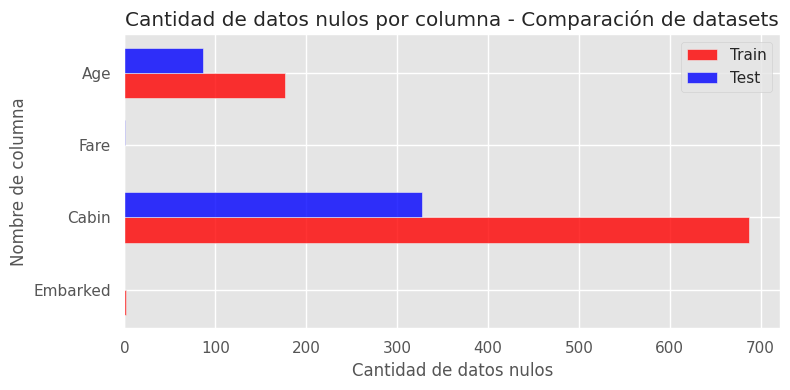

In [7]:
# Grafico de columnas con datos nulos a modo de visualizzación 

sns.set(font_scale=1)
plt.style.use('ggplot')

# Configuración de los datasets y colores
datasets = [train, test]  # Reemplaza con tus datasets
dataset_names = ['Train', 'Test']  # Nombres para la leyenda
colors = ['red', 'blue']  # Colores para cada dataset

fig, ax = plt.subplots(figsize=(8, 4))

# Obtener todas las columnas con datos nulos de ambos datasets
all_null_columns = set()
for dataset in datasets:
    null_cols = dataset.columns[dataset.isnull().any()]
    all_null_columns.update(null_cols)

all_null_columns = list(all_null_columns)
ind = np.arange(len(all_null_columns))
width = 0.35  # Ancho de las barras

# Graficar para cada dataset
for i, (dataset, color, name) in enumerate(zip(datasets, colors, dataset_names)):
    values = []
    for col in all_null_columns:
        if col in dataset.columns:
            values.append(dataset[col].isnull().sum())
        else:
            values.append(0)  # Si la columna no existe en el dataset

    # Posicionar las barras una al lado de la otra
    position = ind + (i * width)
    rects = ax.barh(position, values, width,
                    color=color, label=name, alpha=0.8)

ax.set_yticks(ind + width / 2)
ax.set_yticklabels(all_null_columns, rotation='horizontal')
ax.set_xlabel('Cantidad de datos nulos')
ax.set_ylabel("Nombre de columna")
ax.set_title('Cantidad de datos nulos por columna - Comparación de datasets')
ax.legend()

plt.tight_layout()
plt.show()

##### Grafico de columnas con datos nulos a modo de visualizzación en set de testing test.csv( extra )

##### Consigna B: Imputación de datos

##### Imputación variable AGE

In [8]:
# Imputo la variable AGE con el promedio
mean_age_train = train['Age'].mean()
print(f"Inputo AGE en train con el promedio: {mean_age_train:.2f}")
train['Age'].fillna(mean_age_train, inplace=True)

mean_age_test = test['Age'].mean()
print(f"Inputo AGE en test con el promedio: {mean_age_test:.2f}")
test['Age'].fillna(mean_age_test, inplace=True)



Inputo AGE en train con el promedio: 29.70
Inputo AGE en test con el promedio: 30.27


##### Imputación variable Fare en data frame de test

In [9]:
# Imputación variable FARE en data frame de test
mean_fare_test = test['Fare'].mean()
print(f"Inputo FARE en test con el promedio: {mean_fare_test:.2f}")
test['Fare'].fillna(mean_fare_test, inplace=True)


Inputo FARE en test con el promedio: 35.63


##### Imputación variable EMBARKED usando la moda ya que son letras

In [10]:
# Imputación variable Embarked utilizando la moda ya que son letras
mode_embarked_train = train['Embarked'].mode()[0]
print(f"Inputo EMBARKED en train con la moda: {mode_embarked_train}")
train['Embarked'].fillna(mode_embarked_train, inplace=True)


Inputo EMBARKED en train con la moda: S


##### Imputación variable CABIN

In [11]:
# Imputacion variable CABIN, tiene demasiados datos nulos, por lo que los descarto voy a sacar un porcenaje de datos nulos 
# de train y test
cabin_null_train_percentage = train['Cabin'].isnull().mean() * 100
cabin_null_test_percentage = test['Cabin'].isnull().mean() * 100
print(f"Porcentaje de datos nulos en Cabin (train): {cabin_null_train_percentage:.2f}%")
print(f"Porcentaje de datos nulos en Cabin (test): {cabin_null_test_percentage:.2f}%")


Porcentaje de datos nulos en Cabin (train): 77.10%
Porcentaje de datos nulos en Cabin (test): 78.23%


In [12]:
# Elimino la columna Cabin de ambos data frames
print("Elimino la columna Cabin de ambos data frames, muchos datos nulos") 
train.drop(columns=['Cabin'], axis=1, inplace=True)
test.drop(columns=['Cabin'], axis=1, inplace=True)

train.columns



Elimino la columna Cabin de ambos data frames, muchos datos nulos


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [102]:
test.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Embarked'],
      dtype='object')

##### **Nota:** Los porcentajes de Cabin en train y test están arriba del 75%, procedo a eliminarla

##### Consigna B-2. 

##### Convierto los datos a número, ya que para entrenar un modelo todo debe ser numérico

##### **NOTA:** Usé esta forma de conversión de datos, basado un poco en la lectura y otro tanto usando AI, también usé el código explicado en el video del módulo 2, **No lo aplique use otra opción la que se explico, lo dejo por si quieren verlo**

In [ ]:
# Uso LabelEncoder para convertir las variables categóricas en numéricas
#from sklearn.preprocessing import LabelEncoder

#print("Convierto a número las variables categóricas de train y test")
#pre_columns = ["Sex", "Embarked"]

#for col in pre_columns:
    #encoder = LabelEncoder()

    # Ajustar el encoder con los datos de train
    #encoder.fit(train[col].astype(str))

    # Transformar ambos datasets
    #train[col] = encoder.transform(train[col].astype(str))
    #test[col] = encoder.transform(test[col].astype(str))

# check train
#train.head()

In [13]:
# Convierto a numero las variables categóricas de train y text
print("Convierto a número las variables categóricas de train y test")

# Convertir "Sex" a numero usando map()
train["Sex"] = train["Sex"].map({'male': 0, 'female': 1})
test["Sex"] = test["Sex"].map({'male': 0, 'female': 1})

train.head()

Convierto a número las variables categóricas de train y test


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,S


##### Convertir variable Embarked, usado one-hot

In [14]:
# Convertir la columna Embarked usando one-hot encoding en train y test 
train = pd.get_dummies(train, columns=['Embarked'])
test = pd.get_dummies(test, columns=['Embarked'])

In [15]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,False,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,True,False,False
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,False,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,False,False,True
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,False,False,True


In [16]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked_C,Embarked_Q,Embarked_S
0,892,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,False,True,False
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,False,False,True
2,894,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,False,True,False
3,895,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,False,False,True
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,False,False,True


##### Imputar los datos faltantes, voy a corregir Age y Embarked, que son los más potables a imputar. Cabin lo voy a descartar ya que la cantidad de datos faltantes es mucha y no tengo como hacerlo.

##### Para hacer esto y luego de investigar un poco voy a usar el modelo de vecino cercano, para eso utilizo **from sklearn.imput import KNNImputer**, espero quede bien 

#### **No lo use para no confundir, si lo ven y pueden hacerme una devolución sería productivo. Gracias**

In [ ]:
# uso el modelo de vecino cercano KNN para imputar
#from sklearn.impute import KNNImputer
#imputer_columns = ["Age", "Embarked"]
#imputer = KNNImputer(n_neighbors=5, weights="uniform")
#train[imputer_columns] = imputer.fit_transform(train[imputer_columns])



In [ ]:
# nuestro la informacion luego de la imputacion
#display(train[imputer_columns].info())
#display(train[imputer_columns].sample(5))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       891 non-null    float64
 1   Embarked  891 non-null    float64
dtypes: float64(2)
memory usage: 14.0 KB


None

,Age,Embarked
329,16.000000,0.0
854,44.000000,2.0
739,29.699118,2.0
801,31.000000,2.0
505,18.000000,0.0


##### Borro las columnas que no van a entrenar el modelo - PassengerID, Name, Ticket

In [17]:
# Seleccion las variables que voy a usar para entrenar el modelo - PassengerID, Name, Ticket
features_to_drop = ['PassengerId', 'Name', 'Ticket']
train_processed=train.drop(columns=features_to_drop, axis=1, inplace=True)
test_processed=test.drop(columns=features_to_drop, axis=1, inplace=True)

print("Datos limpios y preprocesados listos para entrenar el modelo.")

Datos limpios y preprocesados listos para entrenar el modelo.


In [18]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,0,3,0,22.0,1,0,7.2500,False,False,True
1,1,1,1,38.0,1,0,71.2833,True,False,False
2,1,3,1,26.0,0,0,7.9250,False,False,True
3,1,1,1,35.0,1,0,53.1000,False,False,True
4,0,3,0,35.0,0,0,8.0500,False,False,True


##### Consigna C - Ajustar primer modelo de regresión logística

In [21]:
# Ajusto el primer modelo de regresión logística
# Defino las variables predictoras y la variable objetivo
print("\nAjustar el modelo de regresión logística")
x = train.drop('Survived', axis=1)
y = train['Survived']


Ajustar el modelo de regresión logística


##### Aplicamos train_test_split

In [28]:
# Divido los datos de 'train' en dos set
# X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
# es IMPORTANTE ya que no tenemos datos de Survived en test.csv
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, random_state=28)

print(f"Datos de entrenamiento divididos: {len(X_train)} para entrenamiento, {len(X_test)} para prueba")

Datos de entrenamiento divididos: 712 para entrenamiento, 179 para prueba


##### Crear el modelo

In [29]:
# Instanciar el modelo o crear
model = LogisticRegression(max_iter=2000)

##### Entreno el modelo

In [30]:
# Entrenamiento del modelo
model.fit(X_train, Y_train)
print("Modelo entrenado con éxito.")

Modelo entrenado con éxito.


##### Consigna D - Entrenamiento y nivel de Accuracy del primer modelo

In [31]:
# Entrenamiento y determinacion de accuracy del primer modelo
print("\n Consigna D: Entrenamiento y nivel de Accuracy del primer modelo")
y_pred = model.predict(X_test)
y_pred


 Consigna D: Entrenamiento y nivel de Accuracy del primer modelo


array([0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 0, 0])

In [32]:
# Calcular el accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Nivel de Accuracy del primer modelo: {accuracy * 100:.2f}%")

Nivel de Accuracy del primer modelo: 79.33%
